# 📊 Notebook 1: Análisis Exploratorio de Datos (EDA) Completo

**Objetivo:** Realizar un análisis exploratorio profundo del dataset CensoPoblacion.xlsx para entender las variables, detectar patrones y preparar insights para el modelado.

**Pregunta 3 del Caso de Estudio:** Realizar un análisis exploratorio de los datos para entender un poco las variables con las cuáles queremos resolver el problema. (02 puntos)


## 1. Importación de Librerías


In [ ]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 10

# Ignorar warnings
import warnings

warnings.filterwarnings("ignore")

print("✅ Librerías importadas exitosamente")

✅ Librerías importadas exitosamente


## 2. Carga de Datos


In [ ]:
# Cargar el dataset
df = pd.read_excel("../CensoPoblacion.xlsx", sheet_name="adult")

print(f"✅ Dataset cargado exitosamente")
print(f"📊 Dimensiones: {df.shape[0]} filas x {df.shape[1]} columnas")
print(f"\n📋 Primeras 5 filas:")
df.head()

✅ Dataset cargado exitosamente
📊 Dimensiones: 32561 filas x 10 columnas

📋 Primeras 5 filas:


,CUSTOMER_ID,EDAD,CAPGANADO,CAPPERD,HORASEMANA,EDUCACIONNUM,EDUCACION,ESTADOCIV,SEXO,INGRESO
0,ID-00PP001,39,2174,0,40,13,Bachelors,Nunca-casado,Masculino,<=50K
1,ID-00PP002,50,0,0,13,13,Bachelors,Casado-civil,Masculino,<=50K
2,ID-00PP003,38,0,0,40,9,HS-grad,Divorciado,Masculino,<=50K
3,ID-00PP004,53,0,0,40,7,11th,Casado-civil,Masculino,<=50K
4,ID-00PP005,28,0,0,40,13,Bachelors,Casado-civil,Femenino,<=50K


## 3. Información General del Dataset


In [ ]:
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("VALORES NULOS")
print("=" * 80)
valores_nulos = df.isnull().sum()
print(valores_nulos)
print(f"\n✅ Total de valores nulos: {df.isnull().sum().sum()}")

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CUSTOMER_ID   32561 non-null  object
 1   EDAD          32561 non-null  int64 
 2   CAPGANADO     32561 non-null  int64 
 3   CAPPERD       32561 non-null  int64 
 4   HORASEMANA    32561 non-null  int64 
 5   EDUCACIONNUM  32561 non-null  int64 
 6   EDUCACION     32561 non-null  object
 7   ESTADOCIV     32561 non-null  object
 8   SEXO          32561 non-null  object
 9   INGRESO       32561 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.5+ MB

VALORES NULOS
CUSTOMER_ID     0
EDAD            0
CAPGANADO       0
CAPPERD         0
HORASEMANA      0
EDUCACIONNUM    0
EDUCACION       0
ESTADOCIV       0
SEXO            0
INGRESO         0
dtype: int64

✅ Total de valores nulos: 0


## 4. Análisis de Variables Numéricas


In [ ]:
variables_numericas = ["EDAD", "CAPGANADO", "CAPPERD", "HORASEMANA", "EDUCACIONNUM"]

print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 80)
df[variables_numericas].describe().round(2)

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,EDAD,CAPGANADO,CAPPERD,HORASEMANA,EDUCACIONNUM
count,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,1077.65,87.30,40.44,10.08
std,13.64,7385.29,402.96,12.35,2.57
min,17.00,0.00,0.00,1.00,1.00
25%,28.00,0.00,0.00,40.00,9.00
50%,37.00,0.00,0.00,40.00,10.00
75%,48.00,0.00,0.00,45.00,12.00
max,90.00,99999.00,4356.00,99.00,16.00


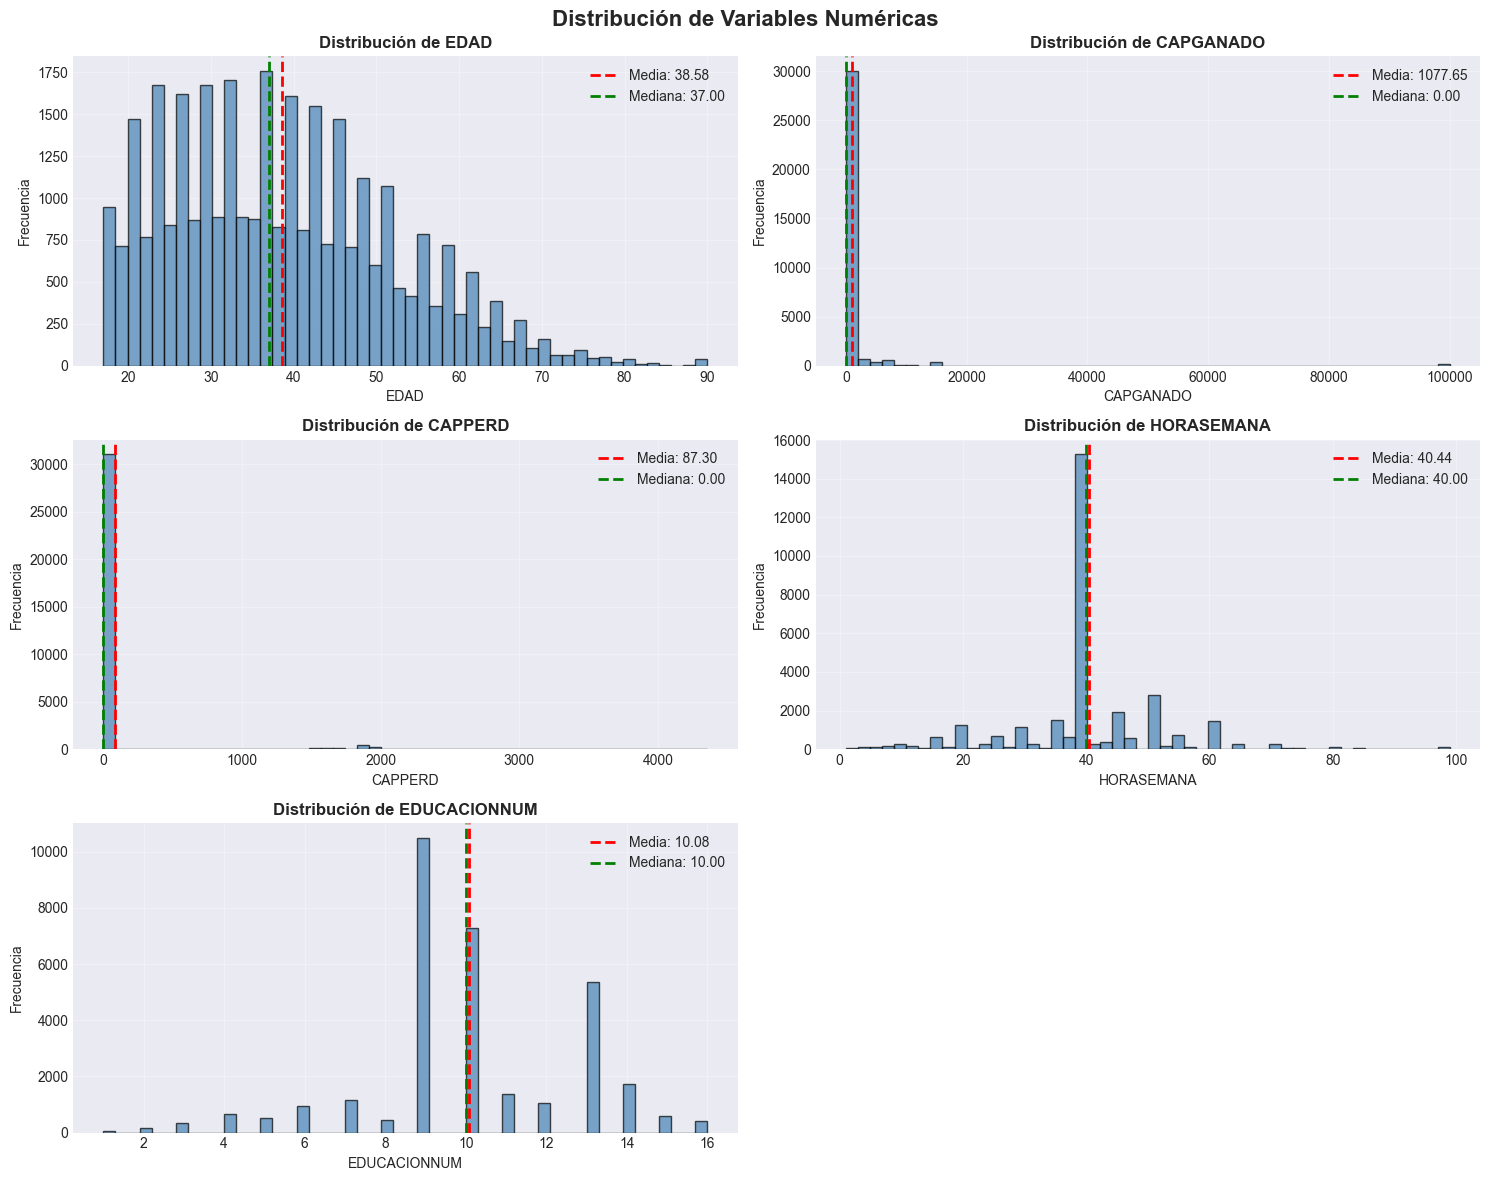

✅ Gráfico guardado: resultados/distribucion_variables_numericas.png


In [9]:
# Distribución de variables numéricas
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle("Distribución de Variables Numéricas", fontsize=16, fontweight="bold")

for idx, variable in enumerate(variables_numericas):
    row = idx // 2
    col = idx % 2

    axes[row, col].hist(
        df[variable], bins=50, edgecolor="black", alpha=0.7, color="steelblue"
    )
    axes[row, col].set_title(f"Distribución de {variable}", fontweight="bold")
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel("Frecuencia")
    axes[row, col].grid(True, alpha=0.3)

    media = df[variable].mean()
    mediana = df[variable].median()
    axes[row, col].axvline(
        media, color="red", linestyle="--", linewidth=2, label=f"Media: {media:.2f}"
    )
    axes[row, col].axvline(
        mediana,
        color="green",
        linestyle="--",
        linewidth=2,
        label=f"Mediana: {mediana:.2f}",
    )
    axes[row, col].legend()

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.savefig(
    "../resultados/distribucion_variables_numericas.png", dpi=300, bbox_inches="tight"
)
plt.show()
print("✅ Gráfico guardado: resultados/distribucion_variables_numericas.png")

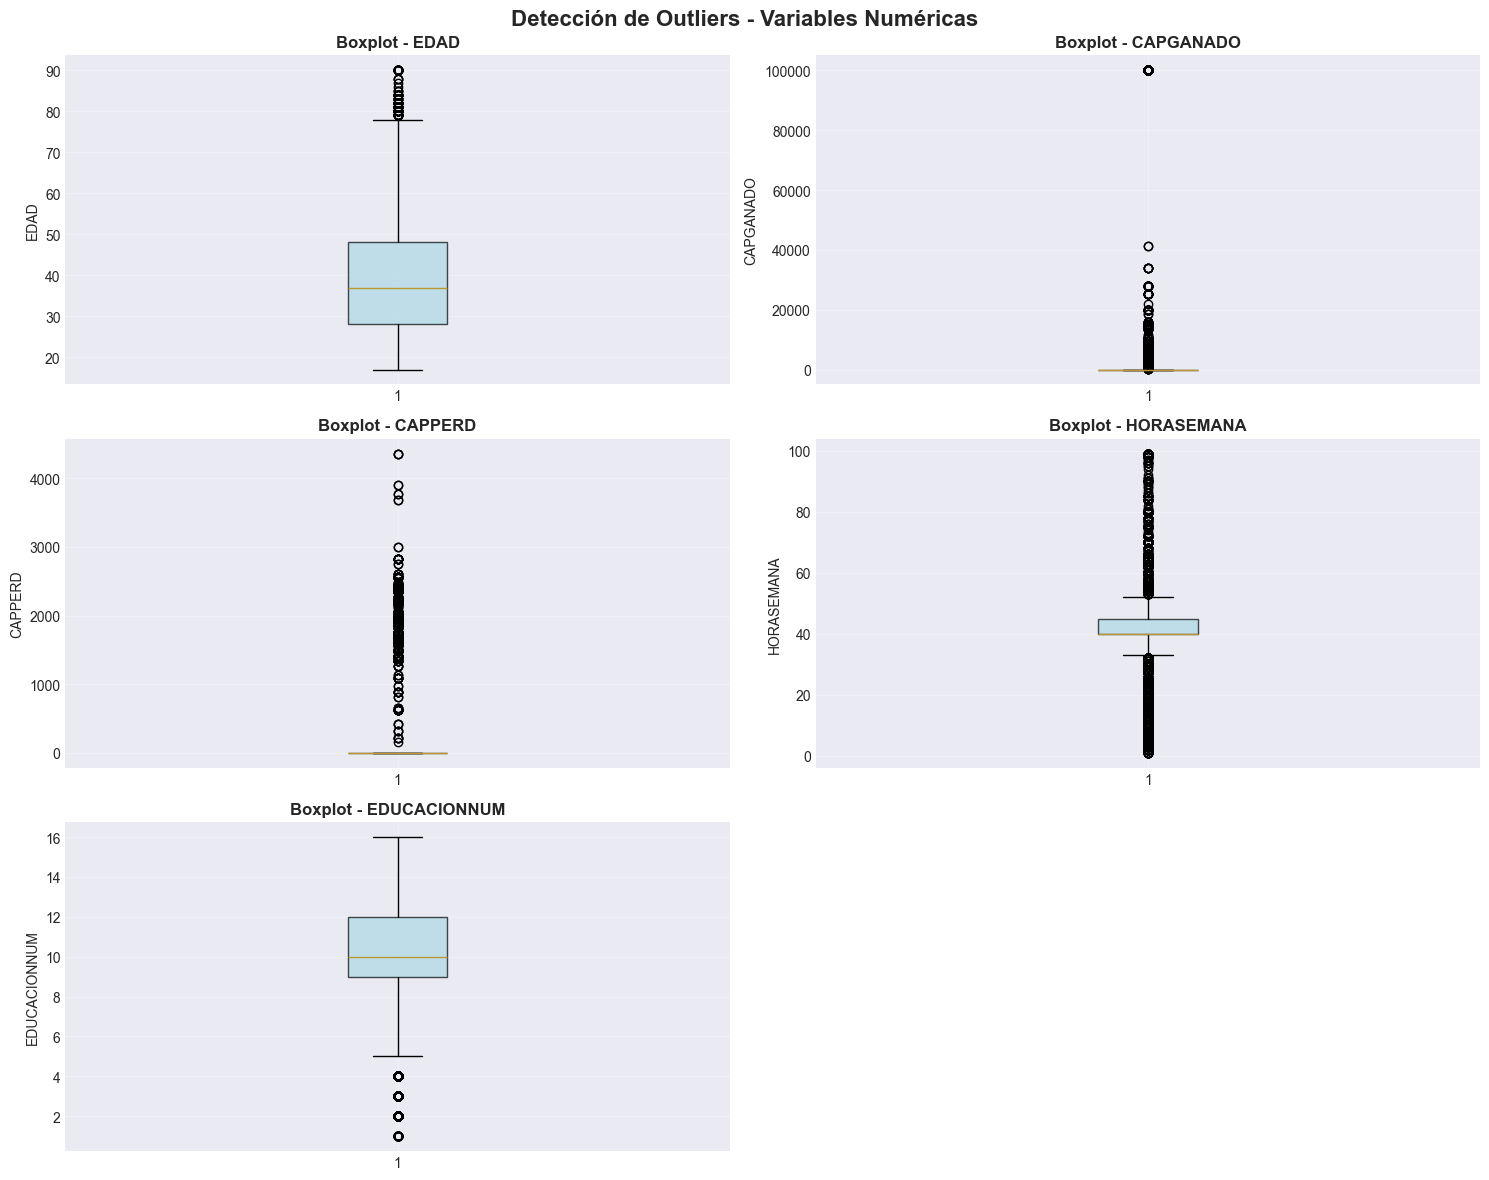

✅ Gráfico guardado: resultados/boxplots_outliers.png


In [12]:
# Boxplots para detectar outliers
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle(
    "Detección de Outliers - Variables Numéricas", fontsize=16, fontweight="bold"
)

for idx, variable in enumerate(variables_numericas):
    row = idx // 2
    col = idx % 2

    axes[row, col].boxplot(
        df[variable],
        vert=True,
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", alpha=0.7),
    )
    axes[row, col].set_title(f"Boxplot - {variable}", fontweight="bold")
    axes[row, col].set_ylabel(variable)
    axes[row, col].grid(True, alpha=0.3)

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.savefig("../resultados/boxplots_outliers.png", dpi=300, bbox_inches="tight")
plt.show()
print("✅ Gráfico guardado: resultados/boxplots_outliers.png")

## 5. Análisis de Variables Categóricas


In [16]:
variables_categoricas = ["EDUCACION", "ESTADOCIV", "SEXO", "INGRESO"]

print("=" * 80)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("=" * 80)

for variable in variables_categoricas:
    print(f"\n{'='*80}")
    print(f"Variable: {variable}")
    print(f"{'='*80}")

    conteo = df[variable].value_counts()
    porcentaje = (df[variable].value_counts(normalize=True) * 100).round(2)

    resumen = pd.DataFrame({"Frecuencia": conteo, "Porcentaje (%)": porcentaje})

    print(resumen)
    print(f"\n📊 Categorías únicas: {df[variable].nunique()}")

ANÁLISIS DE VARIABLES CATEGÓRICAS

Variable: EDUCACION
              Frecuencia  Porcentaje (%)
EDUCACION                               
HS-grad            10501           32.25
Some-college        7291           22.39
Bachelors           5355           16.45
Masters             1723            5.29
Assoc-voc           1382            4.24
11th                1175            3.61
Assoc-acdm          1067            3.28
10th                 933            2.87
7th-8th              646            1.98
Prof-school          576            1.77
9th                  514            1.58
12th                 433            1.33
Doctorate            413            1.27
5th-6th              333            1.02
1st-4th              168            0.52
Preschool             51            0.16

📊 Categorías únicas: 16

Variable: ESTADOCIV
                         Frecuencia  Porcentaje (%)
ESTADOCIV                                          
Casado-civil                  14976           45.99
 Nunc

## 6. Análisis de la Variable Objetivo: INGRESO


In [17]:
print("="*80)
print("ANÁLISIS DE VARIABLE OBJETIVO: INGRESO")
print("="*80)

ingreso_counts = df['INGRESO'].value_counts()
ingreso_pct = (df['INGRESO'].value_counts(normalize=True) * 100).round(2)

for categoria in ingreso_counts.index:
    print(f"{categoria}: {ingreso_counts[categoria]:,} personas ({ingreso_pct[categoria]}%)")

ratio = ingreso_counts.iloc[0] / ingreso_counts.iloc[1]
print(f"\n⚠️ Ratio de desbalance: {ratio:.2f}:1")
if ratio > 1.5:
    print("🚨 IMPORTANTE: Existe desbalance de clases significativo.")


ANÁLISIS DE VARIABLE OBJETIVO: INGRESO
 <=50K: 24,720 personas (75.92%)
 >50K: 7,841 personas (24.08%)

⚠️ Ratio de desbalance: 3.15:1
🚨 IMPORTANTE: Existe desbalance de clases significativo.


In [ ]:
# Gráfico de INGRESO
plt.figure(figsize=(10, 6))
ingreso_counts.plot(kind='bar', color=['salmon', 'lightgreen'], alpha=0.7, edgecolor='black')
plt.title('Distribución de INGRESO (Variable Objetivo)', fontsize=14, fontweight='bold')
plt.xlabel('INGRESO')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
for i, v in enumerate(ingreso_counts.values):
    plt.text(i, v + 500, f'{v}\n({ingreso_pct.iloc[i]}%)', ha='center', fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../resultados/distribucion_ingreso.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gráfico guardado: resultados/distribucion_ingreso.png")


## 7. Análisis Bivariado: Variables vs INGRESO


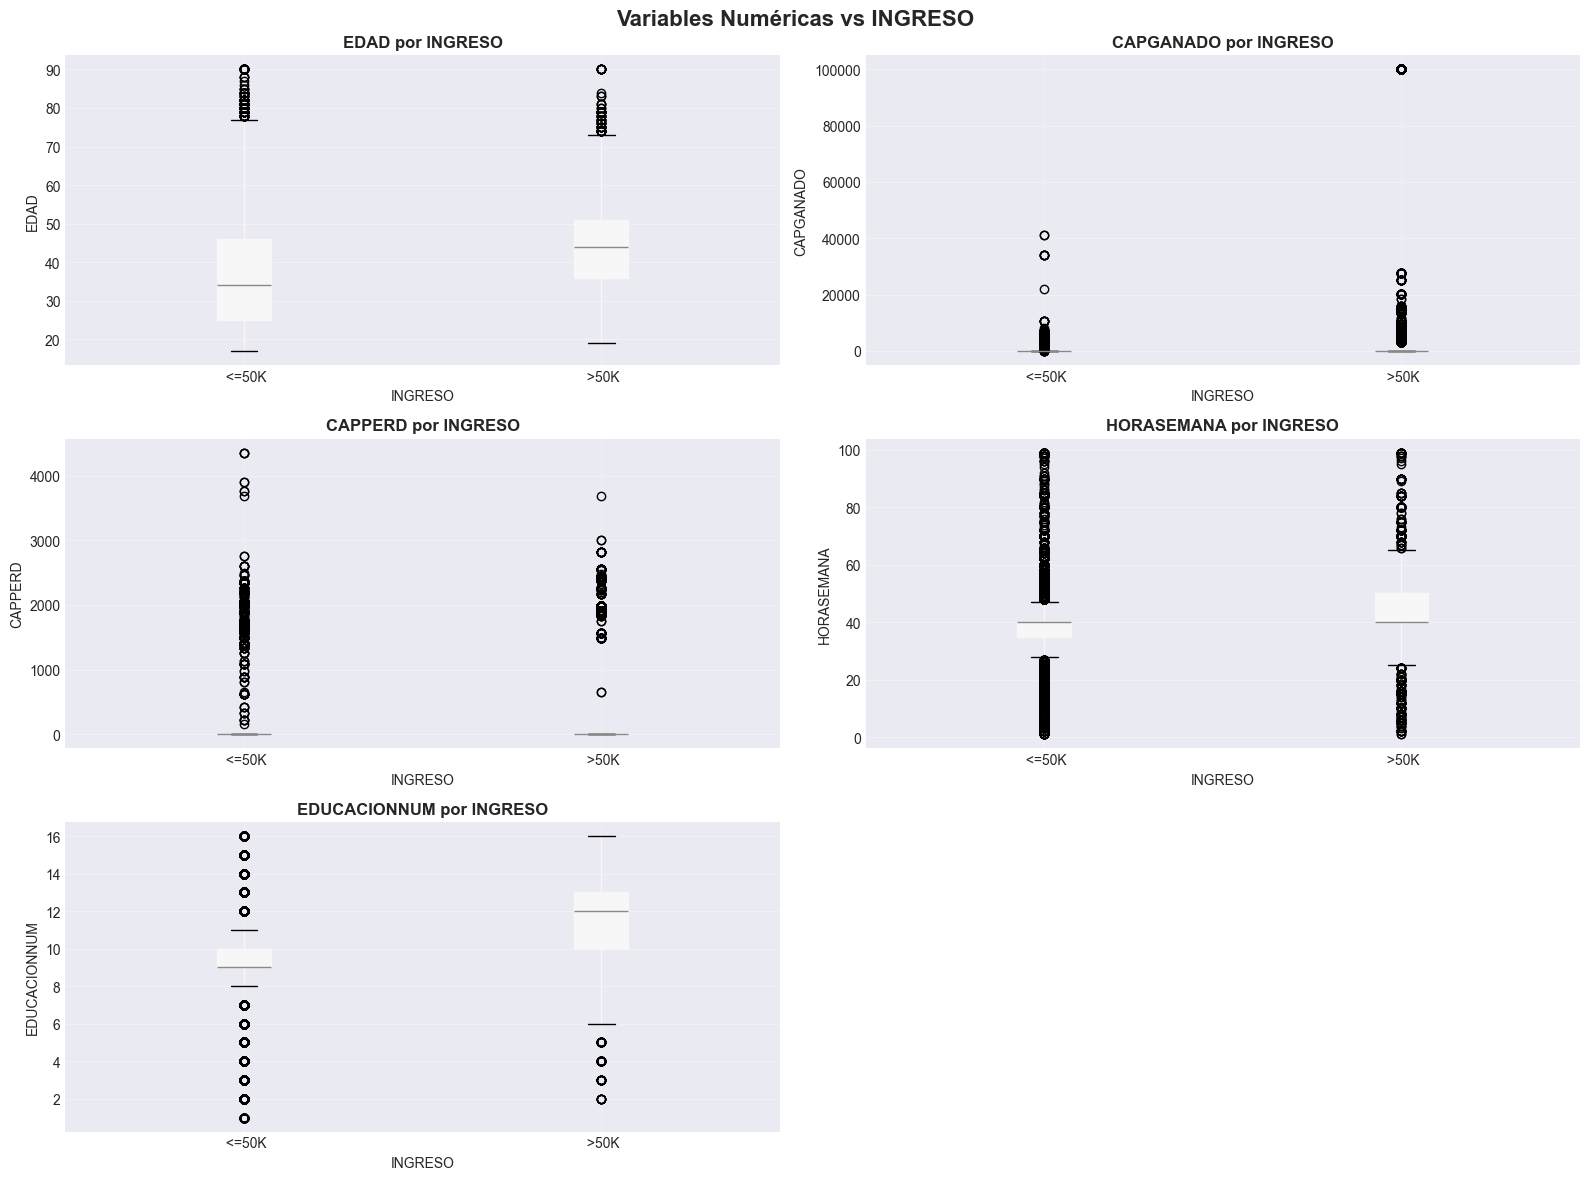


COMPARACIÓN DE MEDIAS POR NIVEL DE INGRESO:
          EDAD  CAPGANADO  CAPPERD  HORASEMANA  EDUCACIONNUM
INGRESO                                                     
<=50K    36.78     148.75    53.14       38.84          9.60
>50K     44.25    4006.14   195.00       45.47         11.61


In [18]:
# Variables numéricas vs INGRESO
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Variables Numéricas vs INGRESO', fontsize=16, fontweight='bold')

for idx, variable in enumerate(variables_numericas):
    row = idx // 2
    col = idx % 2
    df.boxplot(column=variable, by='INGRESO', ax=axes[row, col], patch_artist=True)
    axes[row, col].set_title(f'{variable} por INGRESO', fontweight='bold')
    axes[row, col].set_xlabel('INGRESO')
    axes[row, col].set_ylabel(variable)
    axes[row, col].grid(True, alpha=0.3)

fig.delaxes(axes[2, 1])
plt.suptitle('Variables Numéricas vs INGRESO', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../resultados/numericas_vs_ingreso.png', dpi=300, bbox_inches='tight')
plt.show()

# Comparación de medias
print("\nCOMPARACIÓN DE MEDIAS POR NIVEL DE INGRESO:")
print(df.groupby('INGRESO')[variables_numericas].mean().round(2))


## 8. Matriz de Correlación


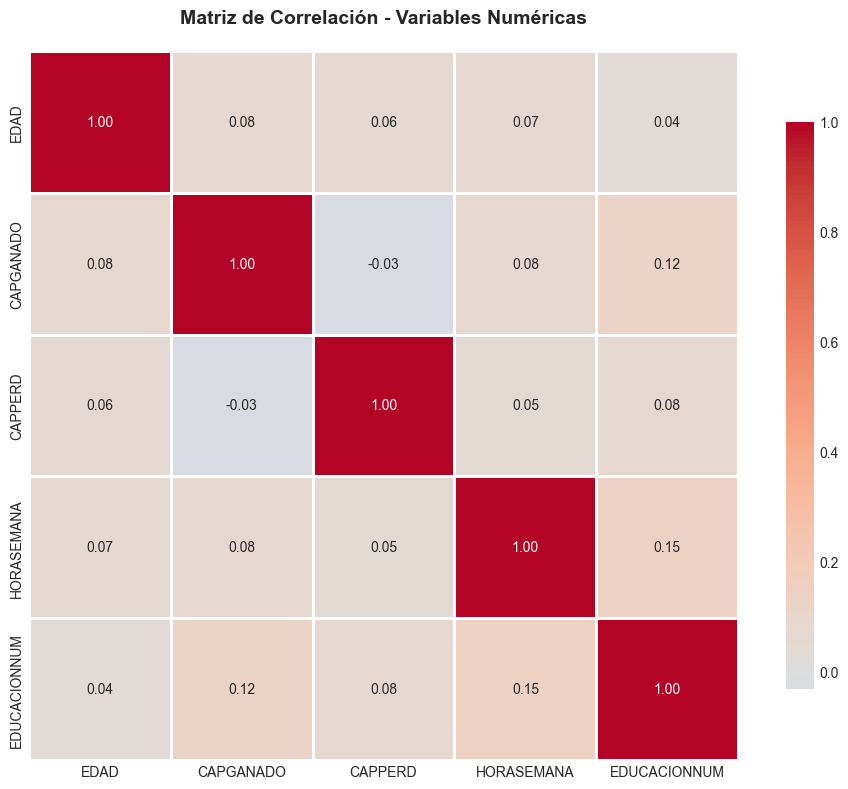

✅ Gráfico guardado: resultados/matriz_correlacion.png


In [19]:
plt.figure(figsize=(10, 8))
correlacion = df[variables_numericas].corr()
sns.heatmap(correlacion, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../resultados/matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()
print("✅ Gráfico guardado: resultados/matriz_correlacion.png")


## 9. Conclusiones del EDA

✅ **Análisis Exploratorio Completado**

### Hallazgos Principales:
1. Dataset completo con 32,561 registros sin valores nulos
2. Desbalance de clases: ~76% <=50K vs ~24% >50K
3. Educación y horas trabajadas son predictores importantes
4. Capital ganado distingue claramente entre grupos de ingreso
5. Se requiere estratificación para el modelado

**➡️ Siguiente paso: Notebook 02 - Preprocesamiento de Datos**
